In [1]:
# grab the functions for making the measurements with the group data
include("../src/obs_funcs.jl")
import Jackknife.get_sdss_subvols

INFO: Checking out Distances master...
INFO: Pulling Distances latest master...
INFO: No packages to install, update or remove


In [2]:
# build the data sample from the group finding catalog
# the function also finds the sample volumes from the redshift range
galdf, samplevols = load_groupdat()

(50107×45 DataFrames.DataFrame
│ Row   │ foo      │ galid  │ groupid │ cenid  │ rband    │ Psat │ Mh         │
├───────┼──────────┼────────┼─────────┼────────┼──────────┼──────┼────────────┤
│ 1     │ "PROB10" │ 17     │ 2485    │ 17     │ -20.4593 │ 0.0  │ 1.5053e12  │
│ 2     │ "PROB10" │ 83     │ 824     │ 83     │ -20.8211 │ 0.0  │ 4.7694e12  │
│ 3     │ "PROB10" │ 93     │ 607     │ 93     │ -21.3781 │ 0.0  │ 6.43239e12 │
│ 4     │ "PROB10" │ 99     │ 11864   │ 99     │ -18.7129 │ 0.0  │ 2.64106e11 │
│ 5     │ "PROB10" │ 218    │ 1424    │ 218    │ -20.839  │ 0.0  │ 2.72175e12 │
│ 6     │ "PROB10" │ 222    │ 1611    │ 222    │ -20.3164 │ 0.0  │ 2.39733e12 │
│ 7     │ "PROB10" │ 237    │ 12835   │ 237    │ -18.4337 │ 0.0  │ 2.41424e11 │
│ 8     │ "PROB10" │ 267    │ 3524    │ 267    │ -20.2159 │ 0.0  │ 1.0267e12  │
│ 9     │ "PROB10" │ 303    │ 9229    │ 303    │ -19.1946 │ 0.0  │ 3.50912e11 │
│ 10    │ "PROB10" │ 888    │ 7205    │ 888    │ -19.4307 │ 0.0  │ 4.63695e11 │
│ 11    │

In [3]:
# compute the jackknife subvolumes that our selected sample belongs to
radecs = zeros(size(galdf)[1], 2)
radecs[:, 1] = rad2deg.(galdf[:ra])
radecs[:, 2] = rad2deg.(galdf[:dec])

galdf[:jackvol] = get_sdss_subvols(radecs)

50107-element Array{Int64,1}:
  1
  2
  2
  2
  2
  2
  2
  2
  2
 16
 16
 21
 11
  ⋮
  7
  7
  7
  7
  7
  7
  7
  7
  7
  6
  6
  6

In [4]:
# define the galaxy mass samples with the following bin edges in log10(M*)
const nmbins = 4
const logMedges = [9.4, 9.8, 10.3, 10.6, 11.0]
const mlabels = [9.7, 10.1, 10.4, 10.7]  # these values are closest to the bin means/medians
const meanMs = Array{Float64}(nmbins)

for i in 1:nmbins
    meanM = mean(galdf[:log10M][logMedges[i] .<= galdf[:log10M] .< logMedges[i + 1]])
    meanMs[i] = meanM
end

In [5]:
# similarly, define the bin edges in log10(δ + 1)
const ndbins = 8
const dbinedges = Array(linspace(-0.8, 1.2, 9))
const dmeans = Array{Float64}(4, 8)

for i in 1:nmbins
    massdf = galdf[logMedges[i] .<= galdf[:log10M] .< logMedges[i + 1], :]
    for j in 1:ndbins
        meand = mean(massdf[:logρ][dbinedges[j] .<= massdf[:logρ] .< dbinedges[j + 1]])
        dmeans[i, j] =  meand
    end
end

logMₛ = 9.7
rₛ = 0.57
χ² = 3.7
χ²_ν = 0.6
p = 0.722
   
logMₛ = 10.1
rₛ = 0.71
χ² = 7.0
χ²_ν = 1.2
p = 0.324
   
logMₛ = 10.4
rₛ = 0.76
χ² = 8.4
χ²_ν = 1.4
p = 0.212
   


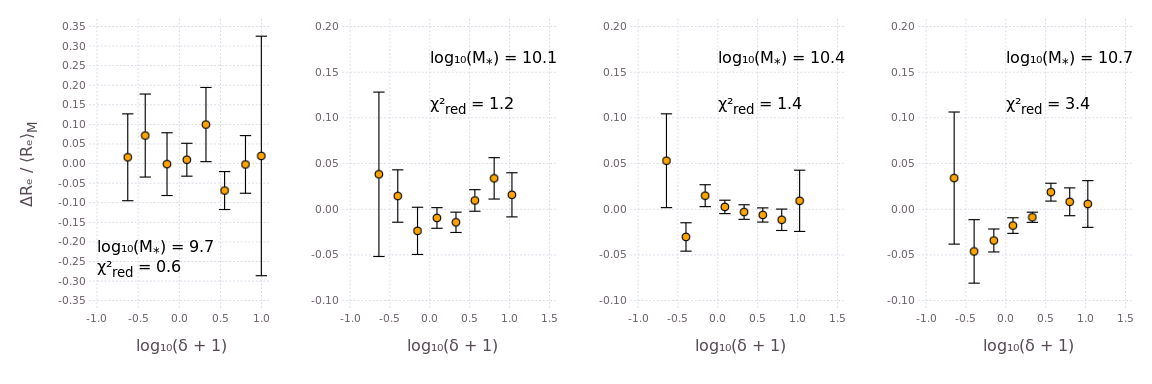

logMₛ = 10.7
rₛ = 0.87
χ² = 20.2
χ²_ν = 3.4
p = 0.003
   


In [14]:
# now to plot some variations in galaxy properties
# start with the scale radius
galdf[:Rₑ] = galdf[:R_e]
yticks = [Array(-0.35:0.05:0.35), Array(-0.1:0.05:0.2), Array(-0.1:0.05:0.2), Array(-0.1:0.05:0.2)]
annotatevals = [[-1, 3], [0, 6], [0, 6], [0, 6]]
replot = massenv_plot(galdf, "Rₑ",
                      yticks, annotatevals,
                      dbinedges, dmeans,
                      ptcolor = "orange")


draw(SVG("finfigs/finplot_Re_d.svg", 12inch, 4inch), replot)  # an svg for the paper
draw(PDF("finfigs/finplot_Re_d.pdf", 12inch, 4inch), replot)  
draw(PNG("finfigs/finplot_Re_d.png", 12inch, 4inch), replot)
display("image/png", read("finfigs/finplot_Re_d.png"))

logMₛ = 9.7
rₛ = 0.86
χ² = 13.2
χ²_ν = 2.2
p = 0.040
   
logMₛ = 10.1
rₛ = 0.95
χ² = 22.4
χ²_ν = 3.7
p = 0.001
   
logMₛ = 10.4
rₛ = 0.94
χ² = 54.0
χ²_ν = 9.0
p = 0.000
   


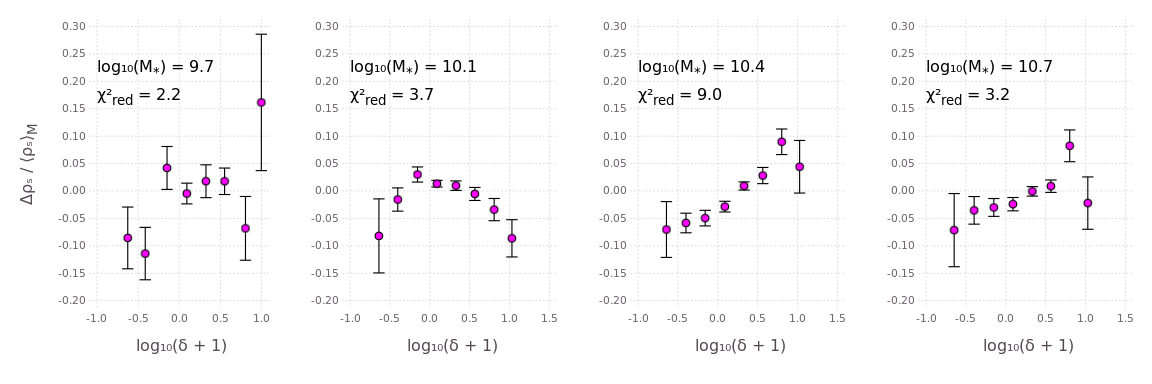

logMₛ = 10.7
rₛ = 0.97
χ² = 19.3
χ²_ν = 3.2
p = 0.004
   


In [15]:
# here's surface density at Rₑ/2
galdf[:ρₛ] = galdf[:surfdensR_eo2]
yticks = [Array(-0.2:0.05:0.3), Array(-0.2:0.05:0.3), Array(-0.2:0.05:0.3), Array(-0.2:0.05:0.3)]
annotatevals = [[-1, 9], [-1, 9], [-1, 9], [-1, 9]]
surfplot = massenv_plot(galdf, "ρₛ",
                        yticks, annotatevals,
                        dbinedges, dmeans,
                        ptcolor = "magenta")

draw(SVG("finfigs/finplot_surfdens_d.svg", 12inch, 4inch), surfplot)
draw(PDF("finfigs/finplot_surfdens_d.pdf", 12inch, 4inch), surfplot)
draw(PNG("finfigs/finplot_surfdens_d.png", 12inch, 4inch), surfplot)
display("image/png", read("finfigs/finplot_surfdens_d.png"))

logMₛ = 9.7
rₛ = 0.92
χ² = 2.0
χ²_ν = 0.3
p = 0.921
   
logMₛ = 10.1
rₛ = 0.95
χ² = 23.9
χ²_ν = 4.0
p = 0.001
   
logMₛ = 10.4
rₛ = 0.97
χ² = 58.7
χ²_ν = 9.8
p = 0.000
   


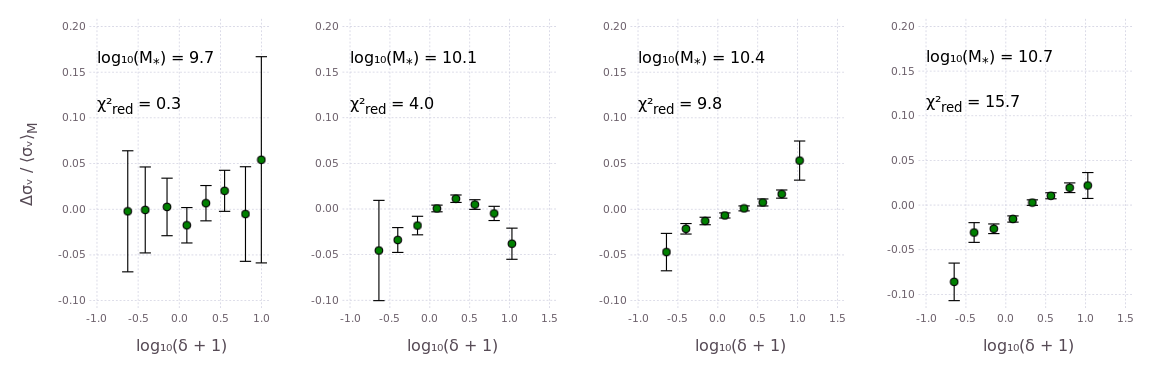

logMₛ = 10.7
rₛ = 0.96
χ² = 94.1
χ²_ν = 15.7
p = 0.000
   


In [16]:
# now for Dn4000
galdf[:σᵥ] = galdf[:vdisp]
yticks = [Array(-0.1:0.05:0.20), Array(-0.1:0.05:0.2), Array(-0.1:0.05:0.2), Array(-0.1:0.05:0.2)]
annotatevals = [[-1, 6], [-1, 6], [-1, 6], [-1, 6]]
vdispplot = massenv_plot(galdf, "σᵥ",
                         yticks, annotatevals,
                         dbinedges, dmeans,
                         ptcolor = "green")

draw(SVG("finfigs/finplot_vdisp_d.svg", 12inch, 4inch), vdispplot)
draw(PDF("finfigs/finplot_vdisp_d.pdf", 12inch, 4inch), vdispplot)
draw(PNG("finfigs/finplot_vdisp_d.png", 12inch, 4inch), vdispplot)
display("image/png", read("finfigs/finplot_vdisp_d.png"))

logMₛ = 9.7
rₛ = 0.97
χ² = 26.6
χ²_ν = 4.4
p = 0.000
   
logMₛ = 10.1
rₛ = 0.99
χ² = 18.2
χ²_ν = 3.0
p = 0.006
   
logMₛ = 10.4
rₛ = 0.98
χ² = 85.9
χ²_ν = 14.3
p = 0.000
   


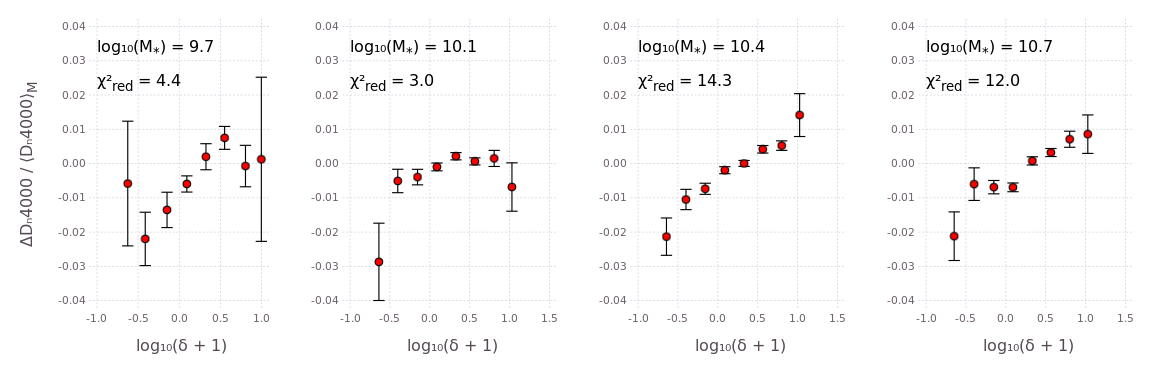

logMₛ = 10.7
rₛ = 0.91
χ² = 72.0
χ²_ν = 12.0
p = 0.000
   


In [19]:
# now for Dn4000
galdf[:Dₙ4000] = galdf[:Dn4000]
yticks = [Array(-0.04:0.01:0.04), Array(-0.04:0.01:0.04), Array(-0.04:0.01:0.04), Array(-0.04:0.01:0.04)]
annotatevals = [[-1, 8], [-1, 8], [-1, 8], [-1, 8]]
dn4kplot = massenv_plot(galdf, "Dₙ4000",
                        yticks, annotatevals,
                        dbinedges, dmeans,
                        ptcolor = "red")

draw(PDF("finfigs/fig1.pdf", 12inch, 4inch), dn4kplot)
draw(PNG("finfigs/finplot_Dn4000_d.png", 12inch, 4inch), dn4kplot)
display("image/png", read("finfigs/finplot_Dn4000_d.png"))